# Project 2 - Arctic ice maps

**Project deadline:** This project is due for submission on Wednesday, 25.05.2022, 23:59. Please check carefully the *About the Projects* section below for further details.

**Important:** You have the choice between two projects. This one has a scientific focus. In the other one, you can program a game and its focus is on elements of the `Python`-language and on programming techniques. We strongly advise you to read through both project notebooks completely before you take a decision.

## About the Projects
- You will get one project approximately every other week.
- Besides the homework-assignmentts, you need to solve the projects in order to pass the course. Your final course mark consists of the mean of your project marks. We aim to hand-out six projects during the term and we do not consider the worst project mark for your final course mark. Projects that you do not hand in are counted with a mark of 4.
- The project needs to be submitted by uploading this notebook to [Projects/Project 2](https://ecampus.uni-bonn.de/goto_ecampus_exc_2645968.html) on eCampus. You do not need to modify the notebooks name before your upload. Your project must be on eCampus by Wednesday, 25.05.2022, 23:59. **No late uploads can be accepted!**
- **In contrast to the homework exercises, each student must hand in an own solution for the projects! Of course you can and should discuss problems with each other! However, you need to be able to explain your solution in detail to your tutor and/or the lecturers! We might ask you for an interview about your project if the solution is (close to) identical to another students submission.**

**Note:** The tutors, Nina and I are very happy to help you out with difficulties you might have with the project tasks! You can ask questions any time but please do so well in advance of the deadlines!

## Introduction

The purpose of this project is to become familiar with working on image data, plotting it, and combining it in various ways for analysis. 

The data used in this problem set was/is collected by two different satellite missions. Involved are the AMSR-E instrument on the [Aqua](http://en.wikipedia.org/wiki/Aqua_%28satellite%29) satellite (data from 2002 to 2011) and the AMSR2 instrument on the [GCOM-W](https://suzaku.eorc.jaxa.jp/GCOM_W/) satellite (data from 2013 to-date). The data consist of maps of the concentration of ice in the Arctic collected between 2002 and 2019 with the exception of 2012. All the data were already downloaded and transformed for you to an easy-to-use format from [here](https://seaice.uni-bremen.de/start/data-archive/). As already stated in the frist project, one of the main issues to work on scientific data with Python is to first read them from various formats into `numpy`-arrays. We will come back to this issue in class but you do not need to worry about it here.

The data you should use are in the directory `/home/shared/Project_2/ice_data` within our online-system. This is actually a (small) subset of the complete satellite data set, with only two ice maps every month (some are missing though). You should explore yourself the original data if you are interested to work with the full data set. I am very happy to help you with that! Although we only work with a small subset of available ice-maps, we would like to ask you *not* to copy them to your private space within our system but to work with them at their current location. We would like to avoid multiplying 400MB more than 100 times! If you would like to use the data on your own computer, there is a `tar`-archive at `/home/shared/Project_2/ice_data_2022.tgz`.

The data is in `numpy` format, which means that you can read it as a `numpy`-array using:

    >>> import numpy as np
    >>> data = np.load('/home/shared/Project_2/ice_data/20080415.npy')

which will give you a 2-d array. Just for information, this was created with:

    >>> np.save('ice_data/20080415.npy', data)
    
where `data` was a 2-d `numpy`-array that was extracted from the original data set.

**Note:** There is an ice-map for each first and each 15th of a month from the years 2003-2011 and 2013-2021 (a small amount of data is missing). For instance, the file `20080415.npy` represents data for the 15th of April 2008.

## Task 1 - getting familiar with the data and examining a single map 

**Please put the solution of this and the other tasks at the end of this notebook! You will submit the modified notebook to eCampus.**

Start off by reading in some  map as shown above, and plot it with Matplotlib (look up the `plt.imshow`-function). Note that to get the correct orientation, you will need to call the ``imshow`` command with the ``origin='lower'`` option, which ensures that the (0,0) pixels is on the bottom left, not the top left. You can try and use different colormaps if you like (set by the ``cmap`` option) - see [here](https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html) (scroll down on the page) for information on the available colormaps. You can specify a colormap to use with e.g. ``cmap=plt.cm.jet`` (i.e. ``cmap=plt.cm.`` followed by the name of the colormap). Note that you can make figures larger by specifying e.g.

    >>> plt.figure(figsize=(8,8))

where the size is given in inches. Try and find a way to plot a colorbar on the side, to show what color corresponds to what value. Remember that you can always look at the [Matplotlib Gallery](http://matplotlib.org/gallery.html) to find example plots for each `matplotlib`-feature. You can also try and remove the tick labels (``100``, ``200``, etc.) since they are not useful - but don't worry if you can't figure out how.

**Remarks:** (1) When you explore the data-values, you will notice that they contain numbers from 0 to 100. A value of 50 means that 50% of the area occupied by the corresponding pixel are covered with ice. A value of zero means that the complete pixel is covered with water; (2) Besides the numbers, a good deal of the pixels contains the special value `nan` (not a number). These are areas covered by land. Functions like `imshow` automatically ignore these values and do not produce an error. If you intend to do numerical calculations (`numpy`) with pixels that have a `nan`-value, the result is `nan` again by default. To ignore `nan`-values for building sums etc., you would need to use functions as `np.nansum` instead of `np.sum` etc.

I show below the result I obtain for this step (one winter and one summer map).
<img src="figs/ice_winter_summer.png" style="height: 300px;">

## Task 2 - reading in and examining multiple maps 

We now want to make a plot of the ice concentration over time. Reading in a single map is easy, but since we have more than 350 maps, we do not want to read them all in individually by hand. Write a loop over all the available files, and inside the loop, read in the data to a variable (e.g. ``data``), and also extract the year, month, and day as integer values (e.g. ``year``, ``month``, and ``day``) from the filename. Then, also inside the loop, construct an array ``times`` which is essentially the fractional time in years. You can assume for simplicity that each month has 30 days and each year has 360 days - this will not affect the results later. As an example, in the year 2003, you would put the 1st of January as $2003.00$, the 2nd of January as $2003 + \frac{1}{360}\approx 2003.033$ and the 1st of February as $2003 + \frac{1}{12}\approx 2003.083$ into the `times`-array. Finally, also compute for each file the total number of pixels that have a value above 50% ice. Put also those values into an array. After the loop, make a plot of the number of pixels with a concentration above 50% against time.

**Hint:** To loop over files, I showed you the `glob`-module in lecture. Make sure that the filenames are *sorted* by name and hence also sorted in time. 

We now want something a little more quantitative than just the number of pixels, so we will try and compute the area where the ice concentration is above a given threshold. However, we first need to know the area of the pixels in the image, and since we are looking at a projection of a spherical surface, each pixel will be a different area. The areas (in km$^{2}$) are contained inside the file named ``ice_data_area.npy`` (within the `/home/shared/Project_2` directory). Read in the areas and make a plot (with colorbar) to see how the pixel area is changing over the image.

Now, loop over the files again as before, but this time, for each file, compute the total area where the concentration of ice is 99% or above. Make a new plot showing the area of >99% ice concentration against time. Also plot the *total area* covered by ice as a function of time.

Describe what you see - how does the minimum value within each year change over time?

## Task 3 - visualizing changes over time; does the amount of ice decrease?

In the following we always work with the *total area* covered by ice from the previous task. 

Find the date at which the area of the region covered with ice is the smallest. What is the value of the minimum area?

**Hint:** Have a look at the `np.argmin` function.

Next, read in the map for this minimum, and the map for the same day and month but from 2003. Make a side-by-side plot showing the two ice-concentrations.

Compute the difference between the two maps so that a loss in ice over time will correspond to a negative value, and a gain in ice will correspond to a positive value. Make a plot of the difference, and use the ``RdBu`` colormap to highlight the changes (include a colorbar).

**Hint:** To make a plot with different sub-figures, check out the `plt.subplot` function.

Finally, plot the `mean` ice concentrations of the years 2004-2006 over the months January to December and compare it to the mean over the years 2019-2021. What was the loss of the ice over the past 15 years at the minimum values?

**Hint:** I showed you in the lecture how to easily do this when converting corresponding data to 2d `numpy`-arrays.

## Epilogue

The data that we have here cover the past twenty years and it is worth noting that the minimum ice coverage you found here was a record minimum - never before (in recorded history) had the size of the ice shelf been so small. This is part of a long term trend due to global warming. Many scientists believe that by ~2050, the Arctic will be completely ice-free for at least part of the summer.

## Task 1

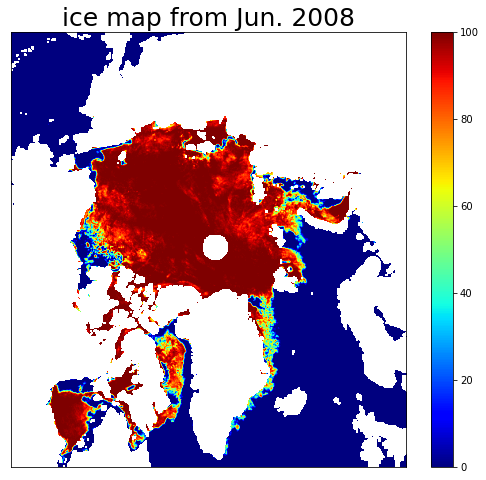

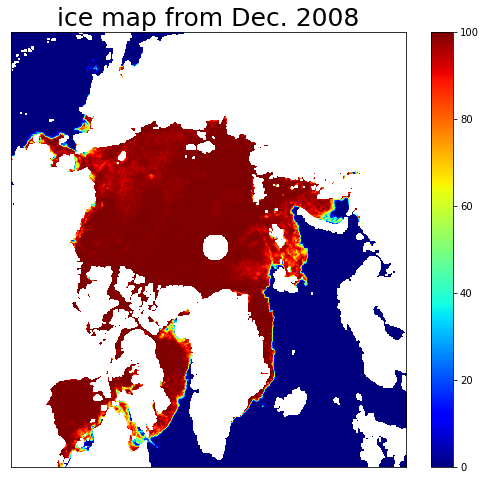

In [1]:
#task 1
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#month_str is used for title plt let the number month into string.
month_str=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

def load_data(year,month,day):
    """
    load_data load the data from file year+month+day.npy 
    return the icemap 2d array with % way (50=50%)
    which is the ice cover procent of the sea, and where the nan is the land.
    """
    if month<10:
        Month='0'+str(int(month))
    else:
        Month=str(int(month))
    if day<10:
        Day='0'+str(int(day))
    else:
        Day=str(int(day))
    data=np.load('./data/ice_data/'+str(int(year))+Month+Day+'.npy')
    return data


def imageplt(year,month,day):
    """
    this function plot the ice map with colorbar
    during the help with load_data function
    the white part is land 
    """
    data=load_data(year,month,day)
    plt.figure(figsize=(9,8))
    imgplot = plt.imshow(data,origin='lower',cmap=plt.cm.jet)
    plt.colorbar()
    #without the ticks
    plt.xticks([])
    plt.yticks([])
    plt.title('ice map from '+month_str[int(month)-1]+'. '+str(int(year)),size=25)
    plt.show()
    
#test
imageplt(2008,6,15)
imageplt(2008,12,15)

## Task 2

In [2]:
def time_to_float(year,month,day):
    """
    This Function will let the year, month, day into a time(float typ)
    Attention!!! because we use 30 days for every month.
    so the day of 31 will have problem. 
    for example 2002,1,1=2002.00
    """
    #if day>30:
        #print('day should not bigger then 30')
    return year+(month-1)/12+(day-1)/360
#test
time_to_float(2003,1,1)

2003.0

In [3]:
import glob
#read all file *.npy from ice_date dictionray
name=glob.glob('./data/ice_data/*.npy')
time_ymd=np.zeros((np.size(name),3))
times=np.zeros(np.size(name))
i=0
for n in name:
    n = n[-12:-4]
    time_ymd[i,0]=int(n[:4])
    time_ymd[i,1]=int(n[4:6])
    time_ymd[i,2]=int(n[6:])
    i+=1
times=time_to_float(time_ymd[:,0],time_ymd[:,1],time_ymd[:,2])
a=np.argsort(times)
times = times[a]
time_ymd=time_ymd[a,:]
print(time_ymd)

[[2.003e+03 1.000e+00 1.000e+00]
 [2.003e+03 1.000e+00 1.500e+01]
 [2.003e+03 2.000e+00 1.000e+00]
 ...
 [2.021e+03 1.100e+01 1.500e+01]
 [2.021e+03 1.200e+01 1.000e+00]
 [2.021e+03 1.200e+01 1.500e+01]]


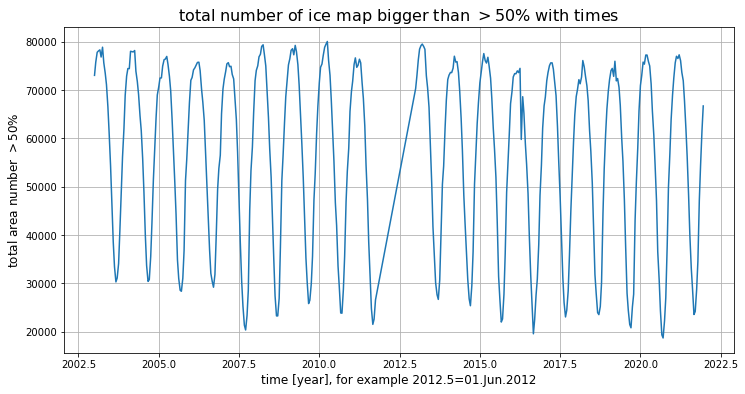

In [4]:
#a value above 50%
total_ice_area_50=np.zeros(np.size(times))
one = np.ones((load_data(time_ymd[0,0],time_ymd[0,1],time_ymd[0,2]).shape))
for i in range(np.size(times)):
    data=load_data(time_ymd[i,0],time_ymd[i,1],time_ymd[i,2])
    total_ice_area_50[i]=np.nansum(one[data>=50])
#print(total_ice_area_50[0])
plt.figure(figsize=(12,6))
plt.plot(times,total_ice_area_50)
plt.xlabel('time [year], for example 2012.5=01.Jun.2012',size=12)
plt.ylabel('total area number $>50\%$',size=12)
plt.grid()
plt.title('total number of ice map bigger than $>50\%$ with times',size=16)
plt.show()

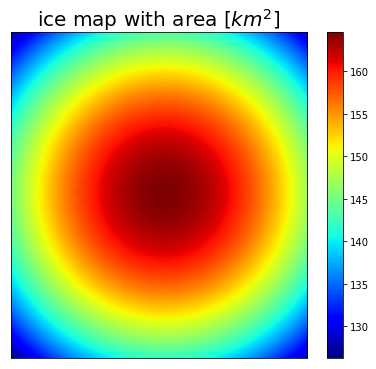

In [5]:
#show the map area in coordinate.
area=np.load('./data/ice_data_area.npy')
plt.figure(figsize=(7,6))
imgplot = plt.imshow(area,origin='lower',cmap=plt.cm.jet)
plt.colorbar()
#without the ticks
plt.xticks([])
plt.yticks([])
plt.title('ice map with area [$km^2$]' ,size=20)
plt.show()

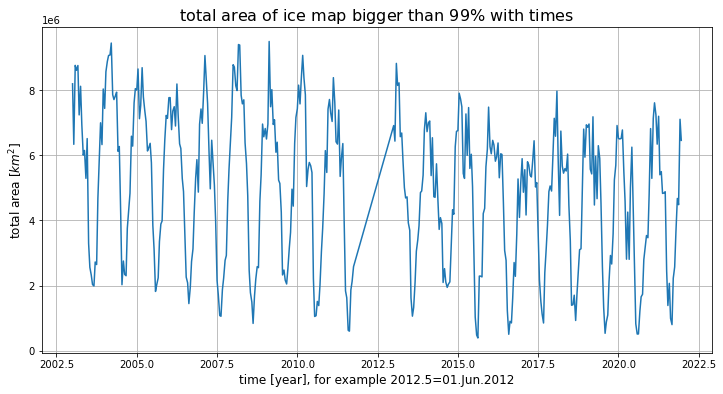

In [6]:
#new loop to 
total_ice_area=np.zeros(np.size(times))
for i in range(np.size(times)):
    data=load_data(time_ymd[i,0],time_ymd[i,1],time_ymd[i,2])
    total_ice_area[i]=np.nansum(data[data>=99]*area[data>=99]/100)
#print(total_ice_area[0])
plt.figure(figsize=(12,6))
plt.plot(times,total_ice_area)
plt.xlabel('time [year], for example 2012.5=01.Jun.2012',size=12)
plt.ylabel('total area [$km^2$]',size=12)
plt.grid()
plt.title('total area of ice map bigger than $99\%$ with times',size=16)
plt.show()

## It is clear that the area is decreasing in winter and summer

## Task3

In [7]:
# Find the minimal total ice area
total_ice_area=np.zeros(np.size(times))
for i in range(np.size(times)):
    data=load_data(time_ymd[i,0],time_ymd[i,1],time_ymd[i,2])
    total_ice_area[i]=np.nansum(area*data/100)

min_year=np.argmin(total_ice_area)###!!!!
print(times[min_year])
print('The minimal area day is '+str(int(time_ymd[min_year,0]))+' '+month_str[int(time_ymd[min_year,1])-1]+' '+str(int(time_ymd[min_year,2])))
print('The value of this area is '+str(total_ice_area[min_year])+' km^2')

2020.7055555555555
The minimal area day is 2020 Sep 15
The value of this area is 2995844.313596686 km^2


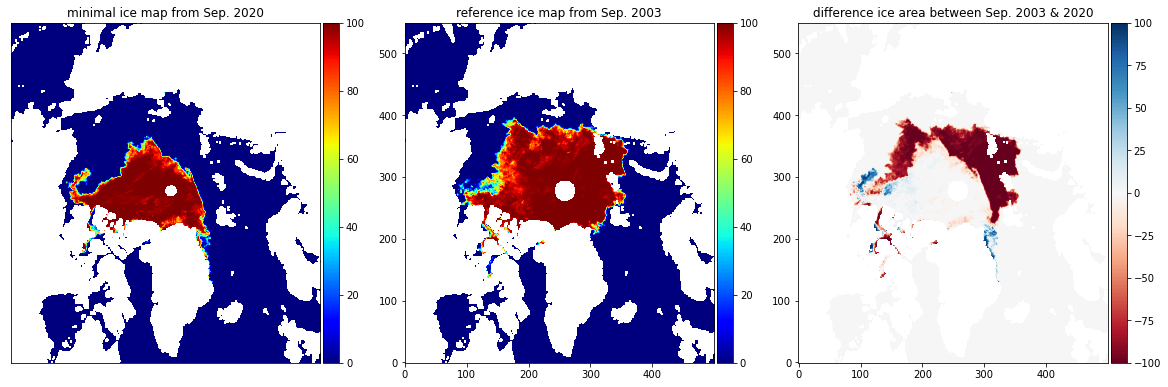

In [8]:
#read the map of the minimal day and the Reference sample in 2003

from mpl_toolkits.axes_grid1 import make_axes_locatable 
#this pakege is used to subplot colorbar 

min_map=load_data(time_ymd[min_year,0],time_ymd[min_year,1],time_ymd[min_year,2])
ref_map=load_data(2003,time_ymd[min_year,1],time_ymd[min_year,2])
#load the min and 2003(in same month and day)as ref data.

die_map=ref_map-min_map
#calculate the difference between the 2003 and the minimal total ice area(2015) in same day.

import matplotlib.colors as mcolors

fig = plt.figure(figsize=(20,60))

ax1=plt.subplot(1,3,1)
min_im=ax1.imshow(min_map,origin='lower',cmap=plt.cm.jet)
plt.title('minimal ice map from '+month_str[int(time_ymd[min_year,1])-1]+'. '+str(int(time_ymd[min_year,0])))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
ax1.set_xticks([])
ax1.set_yticks([])
plt.colorbar(min_im,cax)
#subplot for minimal ice area with colorbar

ax2=plt.subplot(1,3,2)
ref_im=ax2.imshow(ref_map,origin='lower',cmap=plt.cm.jet)
plt.title('reference ice map from '+month_str[int(time_ymd[min_year,1])-1]+'. '+str(2003))
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(ref_im,cax)
#subplot for reference ice area (2003) with colorbar

ax3=plt.subplot(1,3,3)
norm = mcolors.Normalize(vmin=-100, vmax=100)
ref_im=ax3.imshow(-die_map,origin='lower',cmap=plt.cm.RdBu,norm=norm)
plt.title('difference ice area between '+month_str[int(time_ymd[min_year,1])-1]+'. '+str(2003)+' & '+str(int(time_ymd[min_year,0])))
divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(ref_im,cax)
#subplot the differece between the reference and minimal ice area (min-ref)
plt.show()

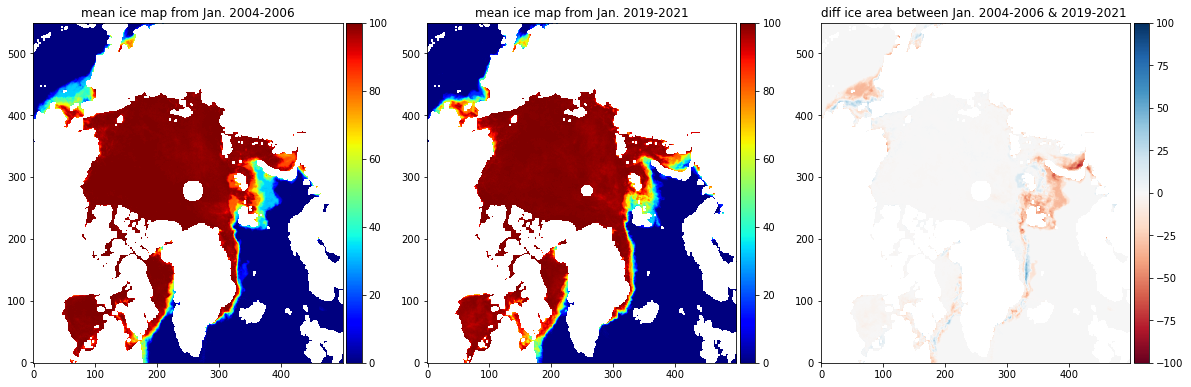

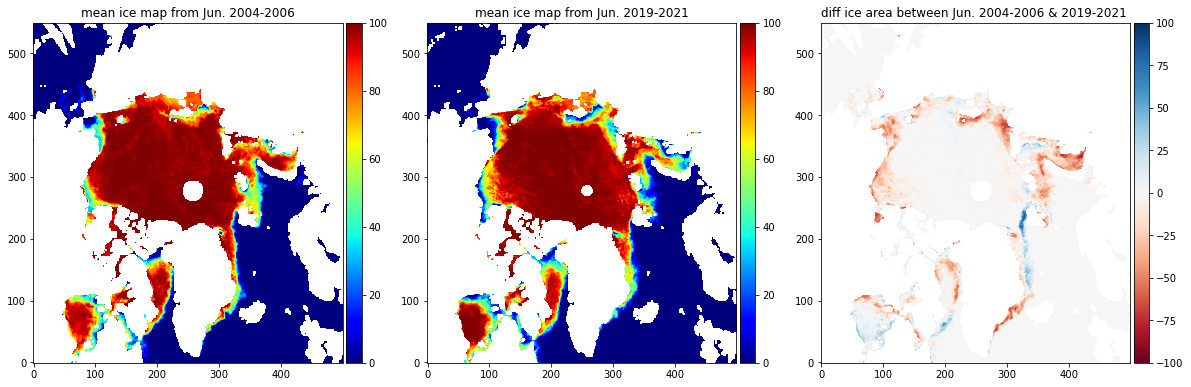

In [9]:
# Calculate the mean area in months from 2004-2006 as ice_map_0406 and 2019-2021 as ice_map_1921

ice_map_0406=np.zeros((ref_map.shape[0],ref_map.shape[1],12))
ice_map_1921=np.zeros((ref_map.shape[0],ref_map.shape[1],12))
#generating empty arrays 

for m in range(12):
    timem=time_ymd[time_ymd[:,1]==m+1]
    #timem is the array of time in m month, with all year and day
    days=0 
    for y in [2004,2005,2006]:
        timemy=timem[timem[:,0]==y]
        #timemy is the array in m month and y year
        for timemyd in timemy:
            #print(timemyd)
            ice_map_0406[:,:,m]+=load_data(timemyd[0],timemyd[1],timemyd[2])
            days+=1
    ice_map_0406[:,:,m]=ice_map_0406[:,:,m]/days

    days=0
    for y in [2019,2020,2021]:
        timemy=timem[timem[:,0]==y]
        #timemy is the array in m month and y year
        for timemyd in timemy:
            #print(timemyd)
            ice_map_1921[:,:,m]+=load_data(timemyd[0],timemyd[1],timemyd[2])
            days+=1
    ice_map_1921[:,:,m]=ice_map_1921[:,:,m]/days


    
def plt_mean_map(month):
    """
    This function is used to plot the mean ice area in 04-06 and 19-21 in months
    input month can in range(12)
    """
    fig = plt.figure(figsize=(20,60))
    ax1=plt.subplot(1,3,1)
    min_im=ax1.imshow(ice_map_0406[:,:,month],origin='lower',cmap=plt.cm.jet)
    plt.title('mean ice map from '+month_str[month]+'. 2004-2006')
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    plt.colorbar(min_im,cax)
    #subplot for mean ice area with colorbar in 2004-2006

    ax2=plt.subplot(1,3,2)
    ref_im=ax2.imshow(ice_map_1921[:,:,month],origin='lower',cmap=plt.cm.jet)
    plt.title('mean ice map from '+month_str[month]+'. 2019-2021' )
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    plt.colorbar(ref_im,cax)
    #subplot for mean ice area with colorbar in 2019-2021
     
    ax3=plt.subplot(1,3,3)
    d=ice_map_0406[:,:,month]-ice_map_1921[:,:,month]
    norm = mcolors.Normalize(vmin=-100, vmax=100)
    ref_im=ax3.imshow(-d,origin='lower',cmap=plt.cm.RdBu,norm=norm)
    plt.title('diff ice area between '+month_str[month]+'. 2004-2006 & 2019-2021 ')
    divider = make_axes_locatable(ax3)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    plt.colorbar(ref_im,cax)
    #subplot the differece ice area (1921-0406)
    plt.show()
    
plt_mean_map(0)
plt_mean_map(5)

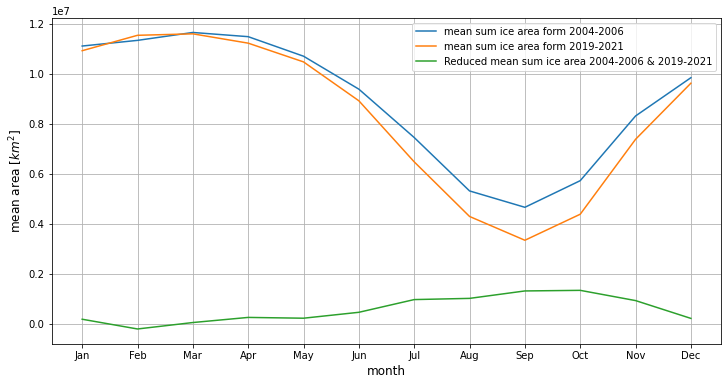

In [10]:
sum_mean_area_0406=np.zeros(12)
sum_mean_area_1921=np.zeros(12)
for i in range(12):
    sum_mean_area_0406[i]=np.nansum(ice_map_0406[:,:,i]*area/100)
    sum_mean_area_1921[i]=np.nansum(ice_map_1921[:,:,i]*area/100)
sum_dif=sum_mean_area_0406-sum_mean_area_1921
plt.figure(figsize=(12,6))
plt.plot(month_str,sum_mean_area_0406,label='mean sum ice area form 2004-2006')
plt.plot(month_str,sum_mean_area_1921,label='mean sum ice area form 2019-2021')
plt.plot(month_str,sum_dif,label='Reduced mean sum ice area 2004-2006 & 2019-2021')
plt.xlabel('month',size=12)
plt.ylabel('mean area [$km^2$]',size=12)
plt.grid()
plt.title('',size=16)
plt.legend()
plt.show()

In [11]:
index_minmal=np.argmin(sum_mean_area_0406)

print('the loss of ice cover in minimal value is '+str(sum_dif[index_minmal])+' [km^2]')
print('In percent is almost '+str(round(sum_dif[index_minmal]/sum_mean_area_0406[index_minmal],4)*100)+'%')

the loss of ice cover in minimal value is 1317707.9407706698 [km^2]
In percent is almost 28.26%
